# A Python Quick Start Tutorial
# Lesson \#1: Basic data types and functions
## by Peter Mackenzie-Helnwein
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Resources

   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Exercise 1

**Theory**:
Stress transformation

$$
\begin{aligned}
\sigma_{x}' &= \sigma_{x} \cos^2\theta + \sigma_{y} \sin^2\theta + 2\tau_{xy} \sin\theta \cos\theta \\
\sigma_{y}' &= \sigma_{x} \sin^2\theta + \sigma_{y} \cos^2\theta - 2\tau_{xy} \sin\theta \cos\theta \\
\tau_{xy}'  &= (\sigma_{y} - \sigma_{x}) \sin\theta \cos\theta + \tau_{xy} (\cos^2\theta - \sin^2\theta) \\
\end{aligned}
$$

**Given**:
Stress state:

$$
\sigma_{x} = 12~ksi~,
~~~
\sigma_{y} = -5.5~ksi~,
~~~
\tau_{xy} = 3.5~ksi 
$$

**Find**:
Components of stress in a rotated coordinate system for $\theta=25^\circ$.

In [1]:
# theta needs to be in radians
# sin and cos are not part of phython

from math import sin, cos, pi, radians

In [2]:
sigmax = 12.
sigmay = -5.5
tau    =  3.5

In [3]:
theta = radians( 25. )

sigmaxp = sigmax*cos(theta)**2 + sigmay*sin(theta)**2 + 2*tau*sin(theta)*cos(theta)
sigmayp = sigmay*sin(theta)**2 + sigmax*cos(theta)**2 - 2*tau*sin(theta)*cos(theta)
taup    = (sigmay - sigmax)*sin(theta)*cos(theta) + tau*(cos(theta)**2 - sin(theta)**2)

In [4]:
print(f"sigx'={sigmaxp:.2f}, sigy'={sigmayp:.2f}, tau'={taup:.2f}")

sigx'=11.56, sigy'=6.19, tau'=-4.45


### Exercise 2

Convert the calculation from exercise 1 to a function

In [5]:
def stressTransform(sigx, sigy, tauxy, theta):
    """
    Transform the stress components sigx, sigy, and tauxy from the original

    Parameters:
    sigx: float, the original stress in the x-direction
    sigy: float, the original stress in the y-direction
    tauxy: float, the original shear stress
    theta: float, the angle of rotation in degrees

    """
    theta = radians(theta)

    sig_xp = sigx*cos(theta)**2 + sigy*sin(theta)**2 + 2*tauxy*sin(theta)*cos(theta)
    sig_yp = sigy*sin(theta)**2 + sigx*cos(theta)**2 - 2*tauxy*sin(theta)*cos(theta)
    tau_xyp    = (sigy - sigx)*sin(theta)*cos(theta) + tauxy*(cos(theta)**2 - sin(theta)**2)
    return (sig_xp, sig_yp, tau_xyp)

Test your function for 

* $\theta=0$ (what should the result look like?)
* $\theta=25^\circ$
* $\theta=180^\circ$

In [6]:
s1,s2,s3 = stressTransform(12., -5.5, 3.5, 0.0)

print(f"sigx'={s1:.2f}, sigy'={s2:.2f}, tau'={s3:.2f}")

sigx'=12.00, sigy'=12.00, tau'=3.50


In [7]:
stress = stressTransform(12., -5.5, 3.5, 25)

print(f"sigx'={stress[0]:.2f}, sigy'={stress[1]:.2f}, tau'={stress[2]:.2f}")

sigx'=11.56, sigy'=6.19, tau'=-4.45


In [8]:
stress = stressTransform(12., -5.5, 3.5, 180)

print("sigx'={:.2f}, sigy'={:.2f}, tau'={:.2f}".format(*stress))

sigx'=12.00, sigy'=12.00, tau'=3.50


### Exercise 3

Let's use this function to study stress transformation.  In order to do so,

1. Create a list of 81 evenly spaced $\theta$-values from $0^\circ$ to $180^\circ$.
2. Compute the transformed stress for each of these values and collect the results in three lists: 

       sigmax_values = ...
       sigmay_values = ...
       tauxy_values = ...

3. print a nice table with 4 columns: $\theta$, $\sigma_x'$, $\sigma_y'$, $\tau_{xy}'$

In [9]:
# sigmax_values = []
# sigmay_values = []
# tauxy_values  = []

# YOUR CODE for 1.
angles = [i*180/80 for i in range(81)]

# YOUR CODE for 2.
stress_values = [stressTransform(sigmax, sigmay, tau, theta)[:] for theta in angles]
sigmax_values, sigmay_values, tauxy_values = zip(*stress_values)


# YOUR CODE for 3.
print("|theta\t| sigx'\t| sigy'\t| tau'\t|")
for i in range(len(angles)):
    print(f"|{angles[i]:.2f}\t| {sigmax_values[i]:.2f}\t| {sigmay_values[i]:.2f}\t| {tauxy_values[i]:.2f}\t|")


|theta	| sigx'	| sigy'	| tau'	|
|0.00	| 12.00	| 12.00	| 3.50	|
|2.25	| 12.25	| 11.70	| 2.80	|
|4.50	| 12.44	| 11.34	| 2.09	|
|6.75	| 12.58	| 10.94	| 1.36	|
|9.00	| 12.65	| 10.49	| 0.62	|
|11.25	| 12.67	| 9.99	| -0.11	|
|13.50	| 12.64	| 9.46	| -0.85	|
|15.75	| 12.54	| 8.88	| -1.59	|
|18.00	| 12.39	| 8.27	| -2.31	|
|20.25	| 12.18	| 7.63	| -3.02	|
|22.50	| 11.91	| 6.96	| -3.71	|
|24.75	| 11.59	| 6.27	| -4.38	|
|27.00	| 11.22	| 5.56	| -5.02	|
|29.25	| 10.81	| 4.84	| -5.63	|
|31.50	| 10.34	| 4.10	| -6.21	|
|33.75	| 9.83	| 3.36	| -6.74	|
|36.00	| 9.28	| 2.63	| -7.24	|
|38.25	| 8.70	| 1.89	| -7.69	|
|40.50	| 8.08	| 1.16	| -8.09	|
|42.75	| 7.43	| 0.45	| -8.45	|
|45.00	| 6.75	| -0.25	| -8.75	|
|47.25	| 6.05	| -0.93	| -9.00	|
|49.50	| 5.34	| -1.58	| -9.19	|
|51.75	| 4.61	| -2.20	| -9.33	|
|54.00	| 3.87	| -2.78	| -9.40	|
|56.25	| 3.14	| -3.33	| -9.42	|
|58.50	| 2.40	| -3.84	| -9.39	|
|60.75	| 1.66	| -4.31	| -9.29	|
|63.00	| 0.94	| -4.72	| -9.14	|
|65.25	| 0.23	| -5.09	| -8.93	|
|67.50	| -0.46	| -

### Exercise 4: Explore plotting in python

For this, check out https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html

I copied the demo code below so you can modify it to plot $(\sigma_{x}'/\tau_{xy}')$ and  $(\sigma_{y}'/-\tau_{xy}')$ curves from the data collected in `sigmax_values`, `sigmay_values`, `tauxy_values`

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/var/folders/q0/kxmqm5c95n7cxc6mmqklw1k40000gq/T/ipykernel_62956/1052974660.py:8: SyntaxWarning: invalid escape sequence '\s'
  ax.set(xlabel="$\sigma_x$", ylabel='$\\tau_y$',


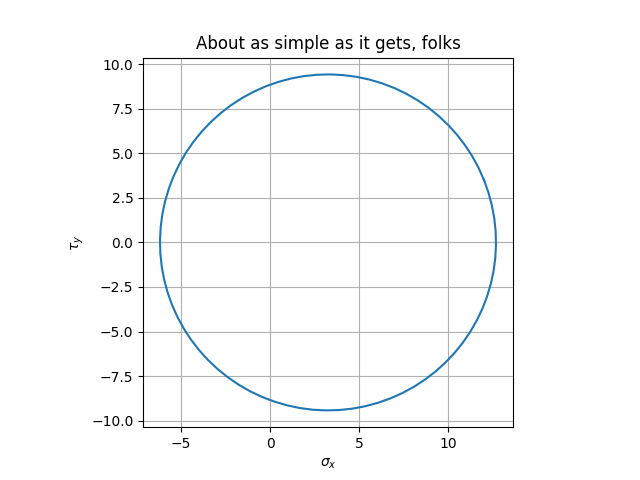

In [11]:
#import matplotlib
import matplotlib.pyplot as plt
%matplotlib widget

fig, ax = plt.subplots()
ax.plot(sigmax_values, tauxy_values)

ax.set(xlabel='$\\sigma_x$', ylabel='$\\tau_y$',
       title='About as simple as it gets, folks')
ax.grid()
ax.set_aspect('equal')

# I comment writing the figure to file ... makes this quicker
# fig.savefig("test.png")
plt.show()

**Remark**: This was just to wet your appetite! We will talk much more about `numpy` and `matplotlib` next week.

## Exercise 5: List versus dictionary

You could express the stress state as

1. three independent variables - the way we did it thus far

2. a list of three values: `stress = `$[\sigma_x, \sigma_y, \tau_{xy}]$ and replace

        sigma_x --> stress[0]
        sigma_y --> stress[2]
        tau_xy  --> stress[3]
        
3. a dictionary 

        stress = {'sigx': 12.0, 'sigy': -5.5, 'tau':3.50}
        
   and replace

        sigma_x --> stress['sigx']
        sigma_y --> stress['sigy']
        tau_xy  --> stress['tau']

**Discuss**:

1. Pros and cons for coding the equations
2. Pros and cons for coding the function(s)
3. How woud code and function change when switching from 2D to 3D (6 components instead of 3 components)

Feel free to implement an alternative form of stressTrannsform() that looks like this:

In [56]:
def stress_transform(stress, theta):
    """
    Transform the components of the 2D stress tensor by rotating the coordinate system by theta degrees.

    Parameters:
    stress: tuple (sigma_x, sigma_y, tau_xy), 
            list [sigma_x, sigma_y, tau_xy], or 
            dict {"sig_x": sigma_x, "sig_y": sigma_y, "tau_xy": tau_xy}
    theta: float, the angle of rotation in degrees

    """
    
    theta = radians(theta)
    sin_theta = sin(theta)
    cos_theta = cos(theta)

    if  isinstance(stress, (list, tuple)):
        sigma_x, sigma_y, tau_xy = stress
    else:
        required_keys = {"sig_x", "sig_y", "tau_xy"}
        if not required_keys.issubset(stress.keys()):
            raise KeyError(f"The 'stress' dictionary must contain the keys: {required_keys}")
        sigma_x = stress["sig_x"]
        sigma_y = stress["sig_y"]
        tau_xy = stress["tau_xy"]

    sx_p = sigma_x*cos_theta**2 + sigma_y*sin_theta**2 + 2*tau_xy*sin_theta*cos_theta
    sy_p = sigma_y*sin_theta**2 + sigma_x*cos_theta**2 - 2*tau_xy*sin_theta*cos_theta
    txy_p = (sigma_y - sigma_x)*sin_theta*cos_theta + tau_xy*(cos_theta**2 - sin_theta**2)

    if isinstance(stress, dict):
        stress2 = {"sig_x": sx_p, "sig_y": sy_p, "tau_xy": txy_p}
    else:
        stress2 = (sx_p, sy_p, txy_p)
    return stress2

In [57]:
stress_list = [12., -5.5, 3.5]
stress_dict = {"sig_x": 12., "sig_y": -5.5, "tau_xy": 3.5}

stress2_list = [stress_transform(stress_list, angle) for angle in angles]
stress2_dict = [stress_transform(stress_dict, angle) for angle in angles]

## Homework questions

We can all learn from your questions!